# 第十六讲 投影矩阵和最小二乘

投影矩阵 $P = A(A^TA)^{-1}A^T$ 可以将向量 $b$ 投影到矩阵 $A$ 的列空间 $C(A)$ 上，即 $Pb \in C(A)$。
* 当向量 $b$ 位于矩阵 $A$ 的列空间时，$Pb = b$。因为 $b \in C(A)$ 时，有 $Ax = b$，即有解，那么 $Pb = A(A^TA)^{-1}A^TAx = Ax = b$
* 当向量 $b$ 垂直于矩阵 $A$ 的列空间时，$Pb = 0$。因为 $b \perp C(A)$，有 $b \in N(A^T)$，即 $A^Tb = 0$，那么 $Pb = A(A^TA)^{-1}A^Tb = A(A^TA)^{-1} * 0 = 0$

向量 $b$ 投影后，向量 $b$ 被分为两个平面上的分量，$b=e+p, p=Pb, e=(I−P)b$，这里的 $p$ 是 $b$ 在 $C(A)$ 中的分量，而 $e$ 是 $b$ 在 $N(A^T)$ 中的分量。

## 最小二乘

最小二乘法（Least Squares）一个常见的应用就是拟合直线。假设有三个点 $(1, 1), (2, 2), (3, 2)$，现在要作一条直线过这三个点，很显然这样的直线是不存在的。当时我们可以求一条误差最小的直线 $y = C + Dt$。

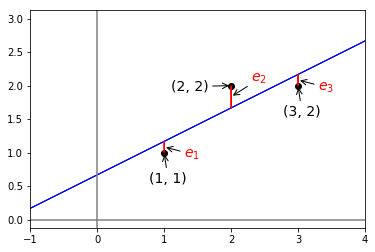

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.axis('equal')
plt.axis([-1, 4, -1, 4])

plt.axhline(y=0, c='gray')
plt.axvline(x=0, c='gray')

plt.scatter([1, 2, 3], [1, 2, 2], c='black')
plt.arrow(-1, 1/6, 5, 5/2, color='blue')

plt.annotate('(1, 1)', xy=(1, 1), xytext=(-15, -30),
             textcoords='offset points', size=14, arrowprops=dict(arrowstyle="->"))
plt.annotate('(2, 2)', xy=(2, 2), xytext=(-60, -5),
             textcoords='offset points', size=14, arrowprops=dict(arrowstyle="->"))
plt.annotate('(3, 2)', xy=(3, 2), xytext=(-15, -30),
             textcoords='offset points', size=14, arrowprops=dict(arrowstyle="->"))

plt.arrow(1, 1, 0, 1/6, color='red')
plt.annotate('$e_1$', color='r', xy=(1, 13/12), xytext=(20, -10),
             textcoords='offset points', size=14, arrowprops=dict(arrowstyle="->"))

plt.arrow(2, 2, 0, -1/3, color='red')
plt.annotate('$e_2$', color='r', xy=(2, 11/6), xytext=(20, 15),
             textcoords='offset points', size=14, arrowprops=dict(arrowstyle="->"))

plt.arrow(3, 2, 0, 1/6, color='red')
plt.annotate('$e_3$', color='r', xy=(3, 25/12), xytext=(20, -10),
             textcoords='offset points', size=14, arrowprops=dict(arrowstyle="->"))

plt.show()

根据三个点，可以列出方程 $\left\{\begin{matrix}C & + & D & =1 \\ C & + & 2D & =2 \\ C & + & 3D & =2\end{matrix}\right.$，化成 $Ax = b$ 形式有 $\begin{bmatrix}1 & 1 \\ 1 & 2 \\ 1 & 3\end{bmatrix}\begin{bmatrix} C \\ D \end{bmatrix} = \begin{bmatrix} 1 \\ 2 \\ 2 \end{bmatrix}$，显然方程无解。

现在我们要在三个点上加上分量 $e_1, e_2, e_3$，使得三点共线，方程有解，并且我们希望 $error = e_1^2 + e_2^2 + e_3^2$ 尽量小，即拥有最小平方和（最小二乘）误差的近似解，也就是 $||Ax - b||^2 = ||e||^2$。

注：如果有另一个点，如(0,100)(0,100)，在本例中该点明显距离别的点很远，最小二乘将很容易被离群的点影响，通常使用最小二乘时会去掉明显离群的点。

现在尝试解出 $\hat{x} = \begin{bmatrix}\hat{C} \\ \hat{D} \end{bmatrix}$：$$A^TA\hat{x} = A^Tb \Rightarrow \begin{bmatrix} 3 & 6 \\ 6 & 14 \end{bmatrix}\begin{bmatrix}\hat{C} \\ \hat{D} \end{bmatrix} = \begin{bmatrix}5 \\ 11 \end{bmatrix} \Rightarrow \left\{\begin{matrix} \hat{C} & = & 2/3\\ \hat{D} & = & 1/2 \end{matrix}\right.$$

所以最优直线为 $y = \frac{2}{3} + \frac{1}{2}t$，那么 $p_1 = \frac{7}{6}, p_2 = \frac{5}{3}, p_3 = \frac{13}{6}$，$e_1 = -\frac{1}{6}, e_2 = \frac{2}{6}, e_3 = -\frac{1}{6}$。我们发现 $b = p + e$，且 $p*e = 0$ 即 $p \perp e$。

我们知道，当向量 $b$ 落在矩阵 $A$ 的列空间上时，方程组有解。那么现在方程组无解，在 $C(A)$ 上最接近向量 $b$ 的就是它在 $C(A)$ 上的投影 $p$。